# Problem Statement:
A new football club named ‘Brussels United FC’ has just been inaugurated.
This club does not have a team yet. The team is looking to hire players
for their roster. Management wants to make such decisions using data 
based approach. During a recent hiring drive, you were selected for the Data Science team as a Junior data scientist. Your team has been tasked with creating a report which recommends players for the main team. To start with, a total 15 players are required. Player data for all teams has been acquired from FIFA. This data contains information about the palyers, the clubs they are currently playing for and various performance measures.
There is a limited budget for hiring players. The team needs 20
possible players to choose from. You have been requested to formulate
a report in order to help the management make a decision regarding 
potential players.




In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import probplot
import statistics
from sklearn.model_selection import train_test_split

In [2]:
#Import the necessary libraries and read the data.
fifa=pd.read_csv("fifa.csv ")
df2=pd.read_csv("fifa_+variable_information.csv")
fifa.head()
df2.head()

,ID,unique id for every player
0,Name,name
1,Age,age
2,Photo,url to the player's photo
3,Nationality,nationality
4,Flag,url to players's country flag


In [3]:
fifa.shape

(18207, 60)

In [4]:
fifa.columns

Index(['ID', 'Name', 'Age', 'Photo', 'Nationality', 'Flag', 'Overall',
       'Potential', 'Club', 'Club Logo', 'Value', 'Wage', 'Preferred Foot',
       'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate',
       'Body Type', 'Position', 'Jersey Number', 'Joined', 'Loaned From',
       'Contract Valid Until', 'Height', 'Weight', 'Crossing', 'Finishing',
       'HeadingAccuracy', 'ShortPassing', 'Volleys', 'Dribbling', 'Curve',
       'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration',
       'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower',
       'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression',
       'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure',
       'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling',
       'GKKicking', 'GKPositioning', 'GKReflexes', 'Release Clause'],
      dtype='object')

In [5]:
fifa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 60 columns):
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null float64
Work Rate                   18159 non-null object
Body Type                   18159 non-null

In [6]:
fifa.describe()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
count,18207.000000,18207.000000,18207.000000,18207.000000,18159.000000,18159.000000,18159.000000,18147.000000,18159.000000,18159.000000,...,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000,18159.000000
mean,214298.338606,25.122206,66.238699,71.307299,1.113222,2.947299,2.361308,19.546096,49.734181,45.550911,...,48.548598,58.648274,47.281623,47.697836,45.661435,16.616223,16.391596,16.232061,16.388898,16.710887
std,29965.244204,4.669943,6.908930,6.136496,0.394031,0.660456,0.756164,15.947765,18.364524,19.525820,...,15.704053,11.436133,19.904397,21.664004,21.289135,17.695349,16.906900,16.502864,17.034669,17.955119
min,16.000000,16.000000,46.000000,48.000000,1.000000,1.000000,1.000000,1.000000,5.000000,2.000000,...,5.000000,3.000000,3.000000,2.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,200315.500000,21.000000,62.000000,67.000000,1.000000,3.000000,2.000000,8.000000,38.000000,30.000000,...,39.000000,51.000000,30.000000,27.000000,24.000000,8.000000,8.000000,8.000000,8.000000,8.000000
50%,221759.000000,25.000000,66.000000,71.000000,1.000000,3.000000,2.000000,17.000000,54.000000,49.000000,...,49.000000,60.000000,53.000000,55.000000,52.000000,11.000000,11.000000,11.000000,11.000000,11.000000
75%,236529.500000,28.000000,71.000000,75.000000,1.000000,3.000000,3.000000,26.000000,64.000000,62.000000,...,60.000000,67.000000,64.000000,66.000000,64.000000,14.000000,14.000000,14.000000,14.000000,14.000000
max,246620.000000,45.000000,94.000000,95.000000,5.000000,5.000000,5.000000,99.000000,93.000000,95.000000,...,92.000000,96.000000,94.000000,93.000000,91.000000,90.000000,92.000000,91.000000,90.000000,94.000000


In [7]:
fifa._get_numeric_data().head()

,ID,Age,Overall,Potential,International Reputation,Weak Foot,Skill Moves,Jersey Number,Crossing,Finishing,...,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes
0,158023,31,94,94,5.0,4.0,4.0,10.0,84.0,95.0,...,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0
1,20801,33,94,94,5.0,4.0,5.0,7.0,84.0,94.0,...,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0
2,190871,26,92,93,5.0,5.0,5.0,10.0,79.0,87.0,...,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0
3,193080,27,91,93,4.0,3.0,1.0,1.0,17.0,13.0,...,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0
4,192985,27,91,92,4.0,5.0,4.0,7.0,93.0,82.0,...,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0


In [8]:
fifa.describe(include='object')

,Name,Photo,Nationality,Flag,Club,Club Logo,Value,Wage,Preferred Foot,Work Rate,Body Type,Position,Joined,Loaned From,Contract Valid Until,Height,Weight,Release Clause
count,18207,18207,18207,18207,17966,18207,18207,18207,18159,18159,18159,18147,16654,1264,17918,18159,18159,16643
unique,17194,18207,164,164,651,679,217,144,2,9,10,27,1736,341,36,21,57,1244
top,J. Rodríguez,https://cdn.sofifa.org/players/4/19/193344.png,England,https://cdn.sofifa.org/flags/14.png,Arsenal,https://cdn.sofifa.org/teams/2/light/240.png,€1.1M,€1K,Right,Medium/ Medium,Normal,ST,"Jul 1, 2018",Atalanta,2019,6'0,165lbs,€1.1M
freq,11,1,1662,1662,33,33,431,4900,13948,9810,10595,2152,1538,20,4819,2881,1483,557


# Data Cleaning:

# Value and Wage Columns

In [9]:
def extract_values(value):
    i=value.replace('€','')
    if 'M' in i:
        i=float(i.replace('M',''))*1000000
    elif 'K' in i:
        i=float(i.replace('K',''))*1000
    return float(i)
fifa['Value1']=fifa['Value'].apply(lambda x:extract_values(x))
fifa['Wage1']=fifa['Wage'].apply(lambda x:extract_values(x))

In [10]:
print(fifa['Value1'].head())
fifa['Wage1'].isnull().any()

0    110500000.0
1     77000000.0
2    118500000.0
3     72000000.0
4    102000000.0
Name: Value1, dtype: float64


False

In [11]:
fifa['Joined_Yr']=fifa['Joined'].dropna().map(lambda x: x.split(",")[1])
fifa['Joined_Yr']

0         2004
1         2018
2         2017
3         2011
4         2015
         ...  
18202     2017
18203     2018
18204     2017
18205     2018
18206     2018
Name: Joined_Yr, Length: 18207, dtype: object

In [12]:
fifa['Contract Valid Until'] = pd.to_datetime(fifa['Contract Valid Until'])
fifa['Contract Valid Until'].head()

0   2021-01-01
1   2022-01-01
2   2022-01-01
3   2020-01-01
4   2023-01-01
Name: Contract Valid Until, dtype: datetime64[ns]

In [13]:
fifa['Height_cm'] = fifa['Height'].dropna().map(lambda x: x.split("'")).str.join(".").astype(float)
fifa['Height_cm'].head()

0    5.70
1    6.20
2    5.90
3    6.40
4    5.11
Name: Height_cm, dtype: float64

In [14]:
fifa['Weight1'] = fifa['Weight'].dropna().apply(lambda x: str(x).rstrip('lbs')).astype(float)

In [15]:
fifa['Weight1']

0        159.0
1        183.0
2        150.0
3        168.0
4        154.0
         ...  
18202    134.0
18203    170.0
18204    148.0
18205    154.0
18206    176.0
Name: Weight1, Length: 18207, dtype: float64

In [16]:
def extract_values(a):
    i = a.replace('€','')
    if 'M' in i:
        i = float(i.replace('M', ''))*1000000
    elif 'K' in i:
        i = float(i.replace('K', ''))*1000
    return float(i)

fifa['Release_Clause'] = fifa['Release Clause'].dropna().apply(lambda x: extract_values(x))

fifa['Release_Clause'].head()

0    226500000.0
1    127100000.0
2    228100000.0
3    138600000.0
4    196400000.0
Name: Release_Clause, dtype: float64

# Dropping the old columns which have been converted

In [17]:
fifa.drop(['Value','Wage','Joined','Height','Weight','Release Clause'], inplace=True,axis=1)


In [18]:
fifa.head()

,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value1,Wage1,Joined_Yr,Height_cm,Weight1,Release_Clause
0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,...,11.0,15.0,14.0,8.0,110500000.0,565000.0,2004,5.70,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,...,11.0,15.0,14.0,11.0,77000000.0,405000.0,2018,6.20,183.0,127100000.0
2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,...,9.0,15.0,15.0,11.0,118500000.0,290000.0,2017,5.90,150.0,228100000.0
3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,2011,6.40,168.0,138600000.0
4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,...,13.0,5.0,10.0,13.0,102000000.0,355000.0,2015,5.11,154.0,196400000.0


In [19]:
fifa.drop(['Club Logo','Photo','Flag','Jersey Number','Volleys'],axis=1,inplace=True)

In [20]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value1,Wage1,Joined_Yr,Height_cm,Weight1,Release_Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,...,11.0,15.0,14.0,8.0,110500000.0,565000.0,2004,5.70,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,...,11.0,15.0,14.0,11.0,77000000.0,405000.0,2018,6.20,183.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,...,9.0,15.0,15.0,11.0,118500000.0,290000.0,2017,5.90,150.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,2011,6.40,168.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,...,13.0,5.0,10.0,13.0,102000000.0,355000.0,2015,5.11,154.0,196400000.0


# Missing Values Imputation

In [21]:
fifa_miss=pd.DataFrame(fifa.isnull().any())
print(fifa_miss)
print("list of null values columns :",list(fifa_miss[fifa_miss[0]==True].index))
print("length of null values columns :",len(list(fifa_miss[fifa_miss[0]==True].index)))

                              0
ID                        False
Name                      False
Age                       False
Nationality               False
Overall                   False
Potential                 False
Club                       True
Preferred Foot             True
International Reputation   True
Weak Foot                  True
Skill Moves                True
Work Rate                  True
Body Type                  True
Position                   True
Loaned From                True
Contract Valid Until       True
Crossing                   True
Finishing                  True
HeadingAccuracy            True
ShortPassing               True
Dribbling                  True
Curve                      True
FKAccuracy                 True
LongPassing                True
BallControl                True
Acceleration               True
SprintSpeed                True
Agility                    True
Reactions                  True
Balance                    True
ShotPowe

# Imputing values by Mean

In [22]:
fifa[['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Joined_Yr', 'Contract Valid Until', 'Height_cm', 'Weight1','Release_Clause']]=fifa[['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Joined_Yr', 'Contract Valid Until','Height_cm','Weight1','Release_Clause']].fillna(fifa[['Club', 'Preferred Foot', 'International Reputation', 'Weak Foot', 'Skill Moves', 'Work Rate', 'Body Type', 'Position', 'Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots', 'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties', 'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving', 'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes', 'Joined_Yr', 'Contract Valid Until', 'Height_cm', 'Weight1', 'Release_Clause']].mean())

# Imputing Categorical values by Mode

In [23]:
fifa_miss = pd.DataFrame(fifa.isnull().any())
print(list(fifa_miss[fifa_miss[0]==True].index))
mode1=fifa['Club'].mode()
mode2=fifa['Preferred Foot'].mode()
mode3=fifa['Work Rate'].mode()
mode4=fifa['Body Type'].mode()
mode5=fifa['Position'].mode()
mode6=fifa['Contract Valid Until'].mode()
mode7=fifa['Joined_Yr'].mode()

['Club', 'Preferred Foot', 'Work Rate', 'Body Type', 'Position', 'Loaned From', 'Contract Valid Until', 'Joined_Yr']


In [24]:
fifa['Club']=fifa['Club'].fillna(mode1[0])
fifa['Preferred Foot']=fifa['Preferred Foot'].fillna(mode2[0])
fifa['Work Rate']=fifa['Work Rate'].fillna(mode3[0])
fifa['Body Type']=fifa['Body Type'].fillna(mode4[0])
fifa['Position']=fifa['Position'].fillna(mode5[0])
fifa['Contract Valid Until']=fifa['Contract Valid Until'].fillna(mode6[0])
fifa['Joined_Yr']=fifa['Joined_Yr'].fillna(mode7[0])

In [25]:
fifa.isna().sum()

ID                              0
Name                            0
Age                             0
Nationality                     0
Overall                         0
Potential                       0
Club                            0
Preferred Foot                  0
International Reputation        0
Weak Foot                       0
Skill Moves                     0
Work Rate                       0
Body Type                       0
Position                        0
Loaned From                 16943
Contract Valid Until            0
Crossing                        0
Finishing                       0
HeadingAccuracy                 0
ShortPassing                    0
Dribbling                       0
Curve                           0
FKAccuracy                      0
LongPassing                     0
BallControl                     0
Acceleration                    0
SprintSpeed                     0
Agility                         0
Reactions                       0
Balance       

In [26]:
fifa.drop(['Loaned From'],inplace=True,axis=1)

In [27]:
fifa.head()

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value1,Wage1,Joined_Yr,Height_cm,Weight1,Release_Clause
0,158023,L. Messi,31,Argentina,94,94,FC Barcelona,Left,5.0,4.0,...,11.0,15.0,14.0,8.0,110500000.0,565000.0,2004,5.70,159.0,226500000.0
1,20801,Cristiano Ronaldo,33,Portugal,94,94,Juventus,Right,5.0,4.0,...,11.0,15.0,14.0,11.0,77000000.0,405000.0,2018,6.20,183.0,127100000.0
2,190871,Neymar Jr,26,Brazil,92,93,Paris Saint-Germain,Right,5.0,5.0,...,9.0,15.0,15.0,11.0,118500000.0,290000.0,2017,5.90,150.0,228100000.0
3,193080,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,2011,6.40,168.0,138600000.0
4,192985,K. De Bruyne,27,Belgium,91,92,Manchester City,Right,4.0,5.0,...,13.0,5.0,10.0,13.0,102000000.0,355000.0,2015,5.11,154.0,196400000.0


# Exploratory Analysis
Distribution of Overall for all players :

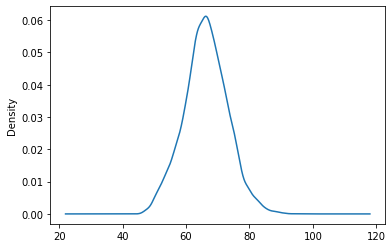

In [28]:
fifa['Overall'].plot(kind='kde')
plt.show()

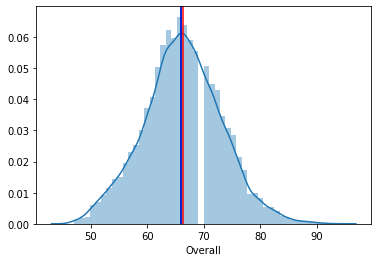

In [29]:
sns.distplot(fifa['Overall'])

plt.axvline(fifa['Overall'].mean(),color='r')
plt.axvline(fifa['Overall'].median(),color='g')
plt.axvline(fifa['Overall'].mode()[0],color='b')
plt.show()

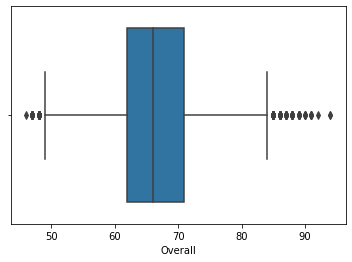

In [30]:
sns.boxplot(fifa['Overall'])

The mean and median are nearly same numerically and hence we can say that there is no skewness.

Most of the players have an Overall rating between 60 to 70.

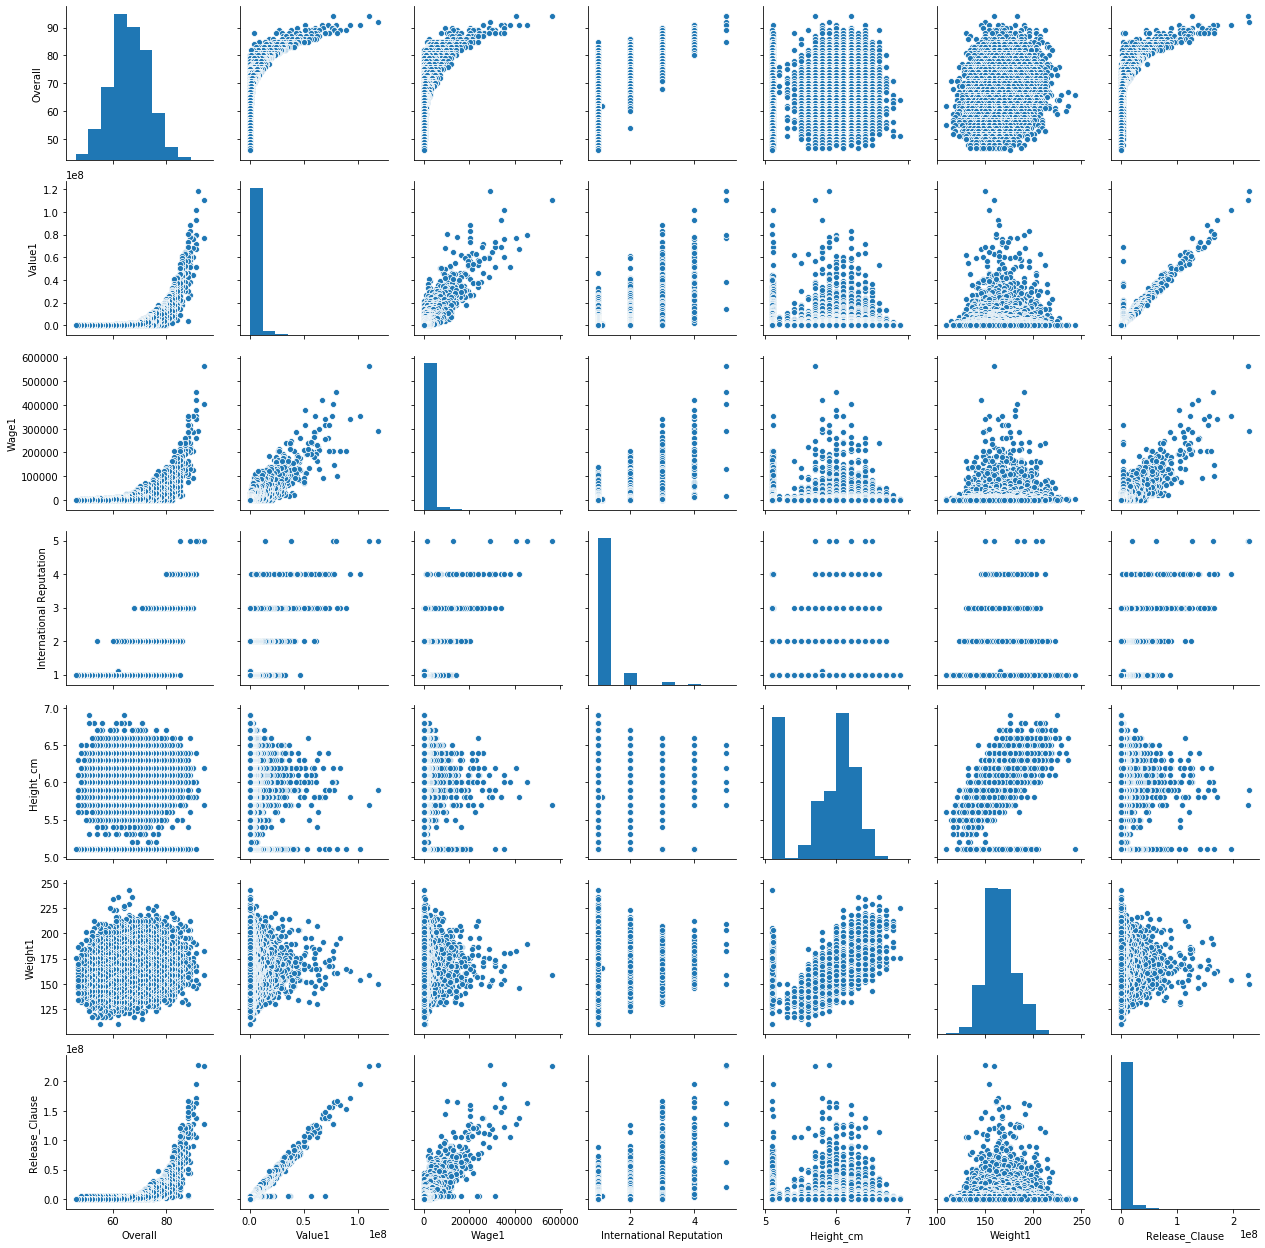

In [31]:
#2.	Generate pair plots for the following variables:
#Overall, Value, Wage, International Reputation, Height, Weight, Release Clause
sns.pairplot(fifa[['Overall', 'Value1','Wage1','International Reputation', 'Height_cm', 'Weight1', 'Release_Clause']])
plt.show()

# 3.	Generate a table containing the top 20 players ranked by Overall score 
#and whose contract expires in 2020.

In [32]:
top_20=fifa[fifa['Contract Valid Until']=='2020'].sort_values(by=['Overall'],ascending=False).head(20)

In [33]:
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value1,Wage1,Joined_Yr,Height_cm,Weight1,Release_Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,2011,6.40,168.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,Right,4.0,4.0,...,9.0,7.0,14.0,9.0,67000000.0,420000.0,2012,5.80,146.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,Right,4.0,3.0,...,8.0,9.0,7.0,11.0,51000000.0,380000.0,2005,6.00,181.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,Right,4.0,4.0,...,12.0,6.0,8.0,8.0,93000000.0,340000.0,2012,5.80,163.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,Left,4.0,2.0,...,15.0,7.0,6.0,12.0,60000000.0,285000.0,2010,5.80,148.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,Right,4.0,4.0,...,5.0,13.0,13.0,10.0,60000000.0,200000.0,2013,6.10,170.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,Left,4.0,3.0,...,3.0,2.0,4.0,3.0,27000000.0,215000.0,2005,6.20,187.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,Right,3.0,5.0,...,14.0,7.0,7.0,6.0,73500000.0,205000.0,2013,5.11,168.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,Right,4.0,3.0,...,12.0,5.0,9.0,10.0,24000000.0,165000.0,2012,6.00,181.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,Right,3.0,4.0,...,10.0,8.0,10.0,4.0,45000000.0,135000.0,2013,5.70,134.0,76500000.0


# a)	What would the average wage for this set of players be?


In [34]:
top_20['Wage1'].mean()

205450.0

# The average age for this set of players is :


In [35]:
top_20['Age'].mean()


30.65

# Correlation between the Overall rating and Value for these players :

,Overall,Value1
Overall,1.000000,0.786717
Value1,0.786717,1.000000


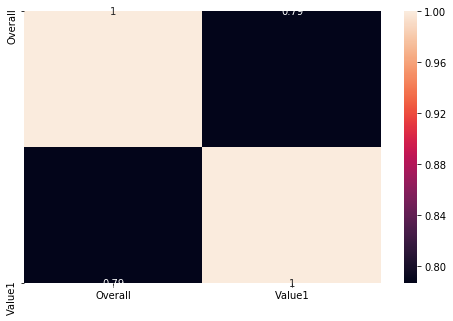

In [36]:
f,ax=plt.subplots(figsize=(8,5))
sns.heatmap(top_20[['Overall','Value1']].corr(),annot=True)
top_20[['Overall','Value1']].corr()

In [37]:
top_20

,ID,Name,Age,Nationality,Overall,Potential,Club,Preferred Foot,International Reputation,Weak Foot,...,GKHandling,GKKicking,GKPositioning,GKReflexes,Value1,Wage1,Joined_Yr,Height_cm,Weight1,Release_Clause
3,193080,De Gea,27,Spain,91,93,Manchester United,Right,4.0,3.0,...,85.0,87.0,88.0,94.0,72000000.0,260000.0,2011,6.40,168.0,138600000.0
6,177003,L. Modrić,32,Croatia,91,91,Real Madrid,Right,4.0,4.0,...,9.0,7.0,14.0,9.0,67000000.0,420000.0,2012,5.80,146.0,137400000.0
8,155862,Sergio Ramos,32,Spain,91,91,Real Madrid,Right,4.0,3.0,...,8.0,9.0,7.0,11.0,51000000.0,380000.0,2005,6.00,181.0,104600000.0
5,183277,E. Hazard,27,Belgium,91,91,Chelsea,Right,4.0,4.0,...,12.0,6.0,8.0,8.0,93000000.0,340000.0,2012,5.80,163.0,172100000.0
13,168542,David Silva,32,Spain,90,90,Manchester City,Left,4.0,2.0,...,15.0,7.0,6.0,12.0,60000000.0,285000.0,2010,5.80,148.0,111000000.0
21,179813,E. Cavani,31,Uruguay,89,89,Paris Saint-Germain,Right,4.0,4.0,...,5.0,13.0,13.0,10.0,60000000.0,200000.0,2013,6.10,170.0,111000000.0
24,138956,G. Chiellini,33,Italy,89,89,Juventus,Left,4.0,3.0,...,3.0,2.0,4.0,3.0,27000000.0,215000.0,2005,6.20,187.0,44600000.0
31,190460,C. Eriksen,26,Denmark,88,91,Tottenham Hotspur,Right,3.0,5.0,...,14.0,7.0,7.0,6.0,73500000.0,205000.0,2013,5.11,168.0,141500000.0
39,164240,Thiago Silva,33,Brazil,88,88,Paris Saint-Germain,Right,4.0,3.0,...,12.0,5.0,9.0,10.0,24000000.0,165000.0,2012,6.00,181.0,44400000.0
50,175943,D. Mertens,31,Belgium,87,87,Napoli,Right,3.0,4.0,...,10.0,8.0,10.0,4.0,45000000.0,135000.0,2013,5.70,134.0,76500000.0


# Separate Tables of top 5 players for each position :

In [38]:
fifa['Position'].value_counts().index

Index(['ST', 'GK', 'CB', 'CM', 'LB', 'RB', 'RM', 'LM', 'CAM', 'CDM', 'RCB',
       'LCB', 'LCM', 'RCM', 'LW', 'RW', 'RDM', 'LDM', 'LS', 'RS', 'RWB', 'LWB',
       'CF', 'LAM', 'RAM', 'RF', 'LF'],
      dtype='object')

# Manual Method to create separate tables of top 5 players for each position

In [39]:
fifa_RCB=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='RCB'].head()
fifa_RCB

,Name,Age,Nationality,Club,Overall,Wage1
8,Sergio Ramos,32,Spain,Real Madrid,91,380000.0
39,Thiago Silva,33,Brazil,Paris Saint-Germain,88,165000.0
54,Piqué,31,Spain,FC Barcelona,87,240000.0
62,R. Varane,25,France,Real Madrid,86,210000.0
70,L. Bonucci,31,Italy,Juventus,86,160000.0


In [40]:
fifa_CB=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='CB'].head()
fifa_CB

,Name,Age,Nationality,Club,Overall,Wage1
12,D. Godín,32,Uruguay,Atlético Madrid,90,125000.0
42,S. Umtiti,24,France,FC Barcelona,87,205000.0
73,M. Benatia,31,Morocco,Juventus,86,160000.0
89,N. Otamendi,30,Argentina,Manchester City,85,170000.0
102,Naldo,35,Brazil,FC Schalke 04,85,38000.0


In [41]:
fifa_GK=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='GK'].head()
fifa_GK

,Name,Age,Nationality,Club,Overall,Wage1
3,De Gea,27,Spain,Manchester United,91,260000.0
9,J. Oblak,25,Slovenia,Atlético Madrid,90,94000.0
18,M. ter Stegen,26,Germany,FC Barcelona,89,240000.0
19,T. Courtois,26,Belgium,Real Madrid,89,240000.0
22,M. Neuer,32,Germany,FC Bayern München,89,130000.0


In [42]:
fifa_LB=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LB'].head()
fifa_LB

,Name,Age,Nationality,Club,Overall,Wage1
35,Marcelo,30,Brazil,Real Madrid,88,285000.0
49,Jordi Alba,29,Spain,FC Barcelona,87,250000.0
64,Alex Sandro,27,Brazil,Juventus,86,160000.0
85,D. Alaba,26,Austria,FC Bayern München,85,110000.0
106,Filipe Luís,32,Brazil,Atlético Madrid,85,81000.0


In [43]:
fifa_LCM=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LCM'].head()
fifa_LCM

,Name,Age,Nationality,Club,Overall,Wage1
11,T. Kroos,28,Germany,Real Madrid,90,355000.0
13,David Silva,32,Spain,Manchester City,90,285000.0
52,M. Hamšík,30,Slovakia,Napoli,87,125000.0
63,M. Verratti,25,Italy,Paris Saint-Germain,86,135000.0
114,Bruno Fernandes,23,Portugal,Sporting CP,84,22000.0


In [44]:
fifa_CAM=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='CAM'].head()
fifa_CAM

,Name,Age,Nationality,Club,Overall,Wage1
17,A. Griezmann,27,France,Atlético Madrid,89,145000.0
31,C. Eriksen,26,Denmark,Tottenham Hotspur,88,205000.0
61,Roberto Firmino,26,Brazil,Liverpool,86,195000.0
66,T. Müller,28,Germany,FC Bayern München,86,135000.0
74,M. Özil,29,Germany,Arsenal,86,190000.0


In [45]:
fifa_CDM=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='CDM'].head()
fifa_CDM

,Name,Age,Nationality,Club,Overall,Wage1
20,Sergio Busquets,29,Spain,FC Barcelona,89,315000.0
27,Casemiro,26,Brazil,Real Madrid,88,285000.0
72,M. Pjanić,28,Bosnia Herzegovina,Juventus,86,180000.0
75,Fernandinho,33,Brazil,Manchester City,86,185000.0
118,Fabinho,24,Brazil,Liverpool,84,120000.0


In [46]:
fifa_LCB=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LCB'].head()
fifa_LCB

,Name,Age,Nationality,Club,Overall,Wage1
24,G. Chiellini,33,Italy,Juventus,89,215000.0
34,M. Hummels,29,Germany,FC Bayern München,88,160000.0
44,K. Koulibaly,27,Senegal,Napoli,87,115000.0
51,J. Vertonghen,31,Belgium,Tottenham Hotspur,87,155000.0
59,V. van Dijk,26,Netherlands,Liverpool,86,165000.0


In [47]:
fifa_RCM=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='RCM'].head()
fifa_RCM

,Name,Age,Nationality,Club,Overall,Wage1
4,K. De Bruyne,27,Belgium,Manchester City,91,355000.0
6,L. Modrić,32,Croatia,Real Madrid,91,420000.0
53,I. Rakitić,30,Croatia,FC Barcelona,87,260000.0
82,J. Kimmich,23,Germany,FC Bayern München,85,92000.0
83,Saúl,23,Spain,Atlético Madrid,85,77000.0


In [48]:
fifa_LS=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LS'].head()
fifa_LS

,Name,Age,Nationality,Club,Overall,Wage1
21,E. Cavani,31,Uruguay,Paris Saint-Germain,89,200000.0
38,G. Higuaín,30,Argentina,Milan,88,245000.0
100,Diego Costa,29,Spain,Atlético Madrid,85,100000.0
151,A. Gómez,30,Argentina,Atalanta,84,53000.0
174,Gerard Moreno,26,Spain,Villarreal CF,83,53000.0


In [49]:
fifa_LF=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LF'].head()
fifa_LF

,Name,Age,Nationality,Club,Overall,Wage1
5,E. Hazard,27,Belgium,Chelsea,91,340000.0
15,P. Dybala,24,Argentina,Juventus,89,205000.0
76,Iniesta,34,Spain,Vissel Kobe,86,21000.0
272,Jonathan Viera,28,Spain,Beijing Sinobo Guoan FC,82,31000.0
1379,S. Blanco,30,Argentina,Portland Timbers,76,9000.0


In [50]:
fifa_RF=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='RF'].head()
fifa_RF

,Name,Age,Nationality,Club,Overall,Wage1
0,L. Messi,31,Argentina,FC Barcelona,94,565000.0
50,D. Mertens,31,Belgium,Napoli,87,135000.0
528,D. Valeri,32,Argentina,Portland Timbers,80,12000.0
890,L. Podolski,33,Germany,Vissel Kobe,78,11000.0
1774,C. Ciano,28,Italy,Frosinone,75,17000.0


In [51]:
fifa_LM=fifa[['Name','Age','Nationality','Club','Overall','Wage1']][fifa['Position']=='LM'].head()
fifa_LM

,Name,Age,Nationality,Club,Overall,Wage1
33,P. Aubameyang,29,Gabon,Arsenal,88,265000.0
58,S. Mané,26,Senegal,Liverpool,86,195000.0
65,Douglas Costa,27,Brazil,Juventus,86,175000.0
68,M. Reus,29,Germany,Borussia Dortmund,86,100000.0
86,Koke,26,Spain,Atlético Madrid,85,88000.0


# Automated Method to create separate tables of top 5 players for each position

In [60]:
position=['RF', 'ST', 'LW', 'GK', 'RCM', 'LF', 'RS', 'RCB', 'LCM', 'CB',
       'LDM', 'CAM', 'CDM', 'LS', 'LCB', 'RM', 'LAM', 'LM', 'LB', 'RDM',
'RW', 'CM', 'RB', 'RAM', 'CF', 'RWB', 'LWB']
df2=fifa[['Name','Nationality','Club','Position','Wage1','Overall']]

In [61]:
print('Printing top 5 players for every Position : \n')
for i in position:
    df=df2[df2['Position']==i].sort_values(by='Overall',ascending=False).head(5)
    print("Top 5 players at Position ",i,' :\n',df)

Printing top 5 players for every Position : 

Top 5 players at Position  RF  :
              Name Nationality              Club Position     Wage1  Overall
0        L. Messi   Argentina      FC Barcelona       RF  565000.0       94
50     D. Mertens     Belgium            Napoli       RF  135000.0       87
528     D. Valeri   Argentina  Portland Timbers       RF   12000.0       80
890   L. Podolski     Germany       Vissel Kobe       RF   11000.0       78
1774     C. Ciano       Italy         Frosinone       RF   17000.0       75
Top 5 players at Position  ST  :
                  Name Nationality               Club Position     Wage1  \
1   Cristiano Ronaldo    Portugal           Juventus       ST  405000.0   
10     R. Lewandowski      Poland  FC Bayern München       ST  205000.0   
16            H. Kane     England  Tottenham Hotspur       ST  205000.0   
23          S. Agüero   Argentina    Manchester City       ST  300000.0   
36            G. Bale       Wales        Real Madrid   

Top 5 players at Position  RDM  :
              Name Nationality               Club Position     Wage1  Overall
45       P. Pogba      France  Manchester United      RDM  210000.0       87
134  Illarramendi       Spain      Real Sociedad      RDM   51000.0       84
198      I. Gueye     Senegal            Everton      RDM  125000.0       83
223   D. De Rossi       Italy               Roma      RDM   80000.0       83
298     M. Parolo       Italy              Lazio      RDM   59000.0       82
Top 5 players at Position  RW  :
               Name Nationality               Club Position     Wage1  Overall
56  Bernardo Silva    Portugal    Manchester City       RW  180000.0       86
60     R. Sterling     England    Manchester City       RW  195000.0       86
79   Marco Asensio       Spain        Real Madrid       RW  215000.0       85
93      A. Sánchez       Chile  Manchester United       RW  215000.0       85
84       R. Mahrez     Algeria    Manchester City       RW  205000.0       85
T

There are no common players in any of the tables as on checked manually.

# Manual Method to find average wage for top 5 players in every position :

In [62]:
print("Average Wage of Top 5 Players in Position GK is ",fifa_GK['Wage1'].mean())
print("Average Wage of Top 5 Players in Position CB is ",fifa_CB['Wage1'].mean())
print("Average Wage of Top 5 Players in Position LB is ",fifa_LB['Wage1'].mean())
print("Average Wage of Top 5 Players in Position LM is ",fifa_LM['Wage1'].mean())

print("Average Wage of Top 5 Players in Position CDM is ",fifa_CDM['Wage1'].mean())
print("Average Wage of Top 5 Players in Position RCB is ",fifa_RCB['Wage1'].mean())
print("Average Wage of Top 5 Players in Position LCB is ",fifa_LCB['Wage1'].mean())
print("Average Wage of Top 5 Players in Position LCM is ",fifa_LCM['Wage1'].mean())
print("Average Wage of Top 5 Players in Position RCM is ",fifa_RCM['Wage1'].mean())  

print("Average Wage of Top 5 Players in Position RF is ",fifa_RF['Wage1'].mean())
print("Average Wage of Top 5 Players in Position LF is ",fifa_LF['Wage1'].mean())

Average Wage of Top 5 Players in Position GK is  192800.0
Average Wage of Top 5 Players in Position CB is  139600.0
Average Wage of Top 5 Players in Position LB is  177200.0
Average Wage of Top 5 Players in Position LM is  164600.0
Average Wage of Top 5 Players in Position CDM is  217000.0
Average Wage of Top 5 Players in Position RCB is  231000.0
Average Wage of Top 5 Players in Position LCB is  162000.0
Average Wage of Top 5 Players in Position LCM is  184400.0
Average Wage of Top 5 Players in Position RCM is  240800.0
Average Wage of Top 5 Players in Position RF is  148000.0
Average Wage of Top 5 Players in Position LF is  121200.0


# Automated Method to find the average wage for top 5 players at every position

In [64]:
print(df2)
print(position)

                     Name Nationality                 Club Position     Wage1  \
0                L. Messi   Argentina         FC Barcelona       RF  565000.0   
1       Cristiano Ronaldo    Portugal             Juventus       ST  405000.0   
2               Neymar Jr      Brazil  Paris Saint-Germain       LW  290000.0   
3                  De Gea       Spain    Manchester United       GK  260000.0   
4            K. De Bruyne     Belgium      Manchester City      RCM  355000.0   
...                   ...         ...                  ...      ...       ...   
18202        J. Lundstram     England      Crewe Alexandra       CM    1000.0   
18203  N. Christoffersson      Sweden       Trelleborgs FF       ST    1000.0   
18204           B. Worman     England     Cambridge United       ST    1000.0   
18205      D. Walker-Rice     England      Tranmere Rovers       RW    1000.0   
18206           G. Nugent     England      Tranmere Rovers       CM    1000.0   

       Overall  
0         

In [65]:
for i in position:
    df=df2[df2['Position']==i].sort_values(by='Overall',ascending=False).head(5)
    print("\nThe average wage for ",i,':',df['Wage1'].mean())


The average wage for  RF : 148000.0

The average wage for  ST : 294000.0

The average wage for  LW : 261000.0

The average wage for  GK : 192800.0

The average wage for  RCM : 240800.0

The average wage for  LF : 121200.0

The average wage for  RS : 132200.0

The average wage for  RCB : 231000.0

The average wage for  LCM : 184400.0

The average wage for  CB : 139600.0

The average wage for  LDM : 126600.0

The average wage for  CAM : 174000.0

The average wage for  CDM : 217000.0

The average wage for  LS : 130200.0

The average wage for  LCB : 162000.0

The average wage for  RM : 131400.0

The average wage for  LAM : 81600.0

The average wage for  LM : 164600.0

The average wage for  LB : 177200.0

The average wage for  RDM : 105000.0

The average wage for  RW : 202000.0

The average wage for  CM : 130600.0

The average wage for  RB : 155400.0

The average wage for  RAM : 45400.0

The average wage for  CF : 47400.0

The average wage for  RWB : 44200.0

The average wage for  LWB : 34